# Writing Good Code

Any fool can write code that a computer can understand. Good programmers write
code that humans can understand. – Martin Fowler

## Overview

When computer programs are small, poorly written code is not overly costly.

But more data, more sophisticated models, and more computer power are enabling
us to take on more challenging problems that involve writing longer programs.

For such programs, investment in good coding practices will pay high returns.

## An Example of Poor Code

Let’s have a look at some poorly written code.

The job of the code is to generate and plot time series of the simplified Solow model

$$
    k_{t+1} = s k_t^{\alpha} + (1 - \delta) k_t,
    \quad t = 0, 1, 2, \ldots 
$$

Here

- $ k_t $ is capital at time $ t $ and  
- $ s, \alpha, \delta $ are parameters (savings, a productivity parameter and depreciation)  

For each parameterization, the code

1. sets $ k_0 = 1 $  
1. iterates using the equation above to produce a sequence $ k_0, k_1, k_2 \ldots , k_T $  
1. plots the sequence  

The plots will be grouped into three subfigures.

In each subfigure, two parameters are held fixed while another varies

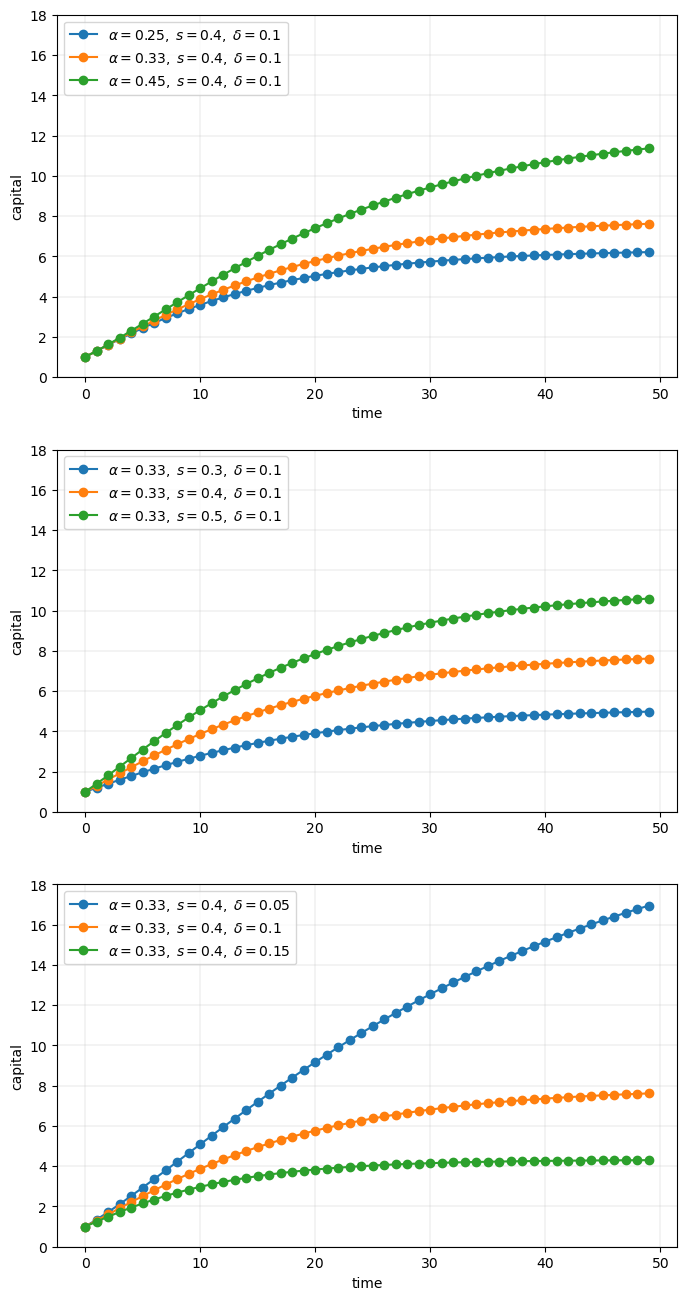

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Allocate memory for time series
k = np.empty(50)

fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Trajectories with different α
δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α[j] + (1 - δ) * k[t]
    axes[0].plot(k, 'o-', label=rf"$\alpha = {α[j]},\; s = {s},\; \delta={δ}$")

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]
    axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s[j]},\; \delta={δ}$")

axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc='upper left', frameon=True)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]
    axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")

axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw=0.2)
axes[2].legend(loc='upper left', frameon=True)

plt.show()

True, the code more or less follows [PEP8](https://peps.python.org/pep-0008/).

At the same time, it’s very poorly structured.

Let’s talk about why that’s the case, and what we can do about it.

## Good Coding Practice

Here are some basic precepts.

### Don’t Use Magic Numbers

If you look at the code above, you’ll see numbers like `50` and `49` and `3`
scattered through the code.

These kinds of numeric literals in the body of your code are sometimes called
“magic numbers”.

This is not a compliment.

While numeric literals are not all evil, the numbers shown in the program above
should certainly be replaced by named constants.

For example, the code above could declare the variable `ts_length = 50`.

Then in the loops, `49` should be replaced by `ts_length - 1`.

The advantages are:

- the meaning is much clearer throughout  
- to alter the time series length, you only need to change one value

### Don’t Repeat Yourself

The other mistake in the code snippet above is repetition.

Blocks of logic (such as the loop to generate time series) are repeated with only minor changes.

This violates a fundamental tenet of programming: Don’t repeat yourself (DRY).

- Also called DIE (duplication is evil).  

Yes, we realize that you can just cut and paste and change a few symbols.

But as a programmer, your aim should be to **automate** repetition, **not** do it yourself.

More importantly, repeating the same logic in different places means that eventually one of them will likely be wrong.

### Minimize Global Variables

Global variables (i.e., names assigned to values outside of any function or class) are convenient.

Rookie programmers typically use global variables with abandon.

But global variables are dangerous, especially in medium to large size programs, since

- they can affect what happens in any part of your program  
- they can be changed by any function  

This makes it much harder to be certain about what some  small part of a given piece of code actually commands.

While the odd global in small scripts is no big deal, we recommend that you
teach yourself to avoid them.

(We’ll discuss how just below).

#### JIT Compilation

For scientific computing, there is another good reason to avoid global variables.

JIT compilation can generate excellent performance for scripting languages like Python.

But the task of the compiler used for JIT compilation becomes harder when global
variables are present.

Put differently, the type inference required for JIT compilation is safer and
more effective when variables are sandboxed inside a function.

### Use Functions 

Fortunately, we can easily avoid the evils of global variables and WET code.

- WET stands for “we enjoy typing” and is the opposite of DRY.  

We can do this by making frequent use of functions or classes.

In fact, functions are designed specifically to help us avoid shaming ourselves
by repeating code or excessive use of global variables.

## Revisiting the Example

Here’s some code that reproduces the plot above with better coding style.

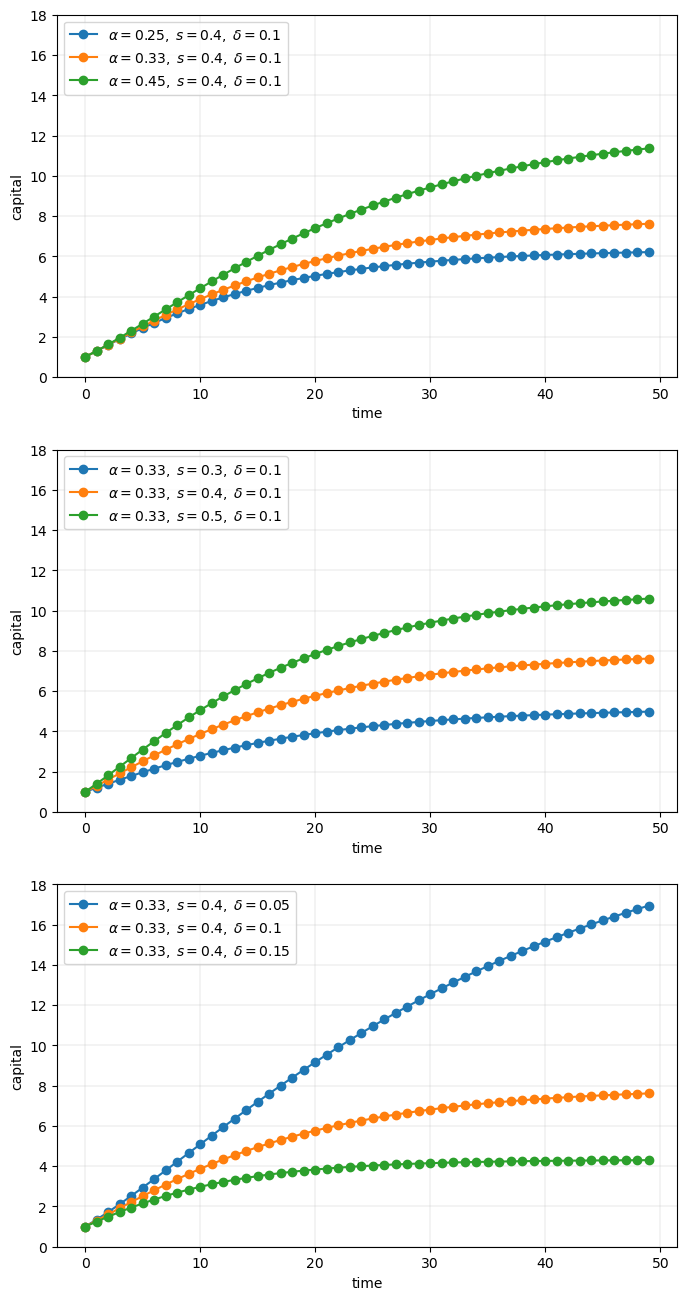

In [2]:
def simulate_solow(α, s, δ, ts_length=50):
    """Simulate the Solow model."""
    k = np.empty(ts_length)
    k[0] = 1
    for t in range(ts_length - 1):
        k[t+1] = s * k[t]**α + (1 - δ) * k[t]
    return k


def plot_solow(ax, vary_param, param_vals, α=0.33, s=0.4, δ=0.1):
    """Plot Solow trajectories while varying one parameter."""
    for val in param_vals:
        params = {'α': α, 's': s, 'δ': δ}
        params[vary_param] = val
        k = simulate_solow(**params)
        label = (rf"$α = {params['α']},\; "
                  rf"s = {params['s']},\; "
                  rf"δ = {params['δ']}$")
        ax.plot(k, 'o-', label=label)

    ax.grid(lw=0.2)
    ax.set_ylim(0, 18)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.legend(loc='upper left', frameon=True)


# Create plots
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

plot_solow(axes[0], 'α', (0.25, 0.33, 0.45))
plot_solow(axes[1], 's', (0.3, 0.4, 0.5))
plot_solow(axes[2], 'δ', (0.05, 0.1, 0.15))

plt.show()

If you inspect this code, you will see that

- it uses functions to avoid repetition and break up logical components.  
- Global variables are quarantined by collecting them together at the end, not the start of the program.  
- Magic numbers are avoided.  

## Exercise

Here is some code that needs improving.

It involves a basic supply and demand problem.

Supply is given by

$$
    q_s(p) = \exp(\alpha p) - \beta.
$$

The demand curve is

$$
    q_d(p) = \gamma p^{-\delta}.
$$

The equilibrium $ p^* $ is the price such that $ q_d(p) = q_s(p) $.

The equilibrium quantity is then $ q^* = q_s(p^*) $

We can solve for the equilibrium using a root finding algorithm.

Specifically, we will find the $ p $ such that $ h(p) = 0 $, where

$$
    h(p) := q_d(p) - q_s(p)
$$

The parameter values will be

- $ \alpha = 0.1 $  
- $ \beta = 1 $  
- $ \gamma = 1 $  
- $ \delta = 1 $


In [3]:
from scipy.optimize import brentq

# Compute equilibrium
def h(p):
    return p**(-1) - (np.exp(0.1 * p) - 1)  # demand - supply

p_star = brentq(h, 2, 4)
q_star = np.exp(0.1 * p_star) - 1

print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  2.93
Equilibrium quantity is  0.34


Let’s also plot our results.

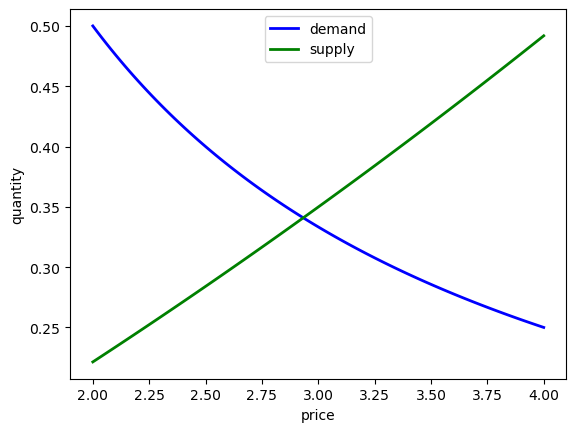

In [4]:
# Now plot
grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * grid) - 1
qd = grid**(-1)


ax.plot(grid, qd, 'b-', lw=2, label='demand')
ax.plot(grid, qs, 'g-', lw=2, label='supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

We also want to consider supply and demand shifts.

For example, let’s see what happens when demand shifts up, with $ \gamma $ increasing to $ 1.25 $:

In [5]:
# Compute equilibrium
def h(p):
    return 1.25 * p**(-1) - (np.exp(0.1 * p) - 1)

p_star = brentq(h, 2, 4)
q_star = np.exp(0.1 * p_star) - 1

print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  3.25
Equilibrium quantity is  0.38


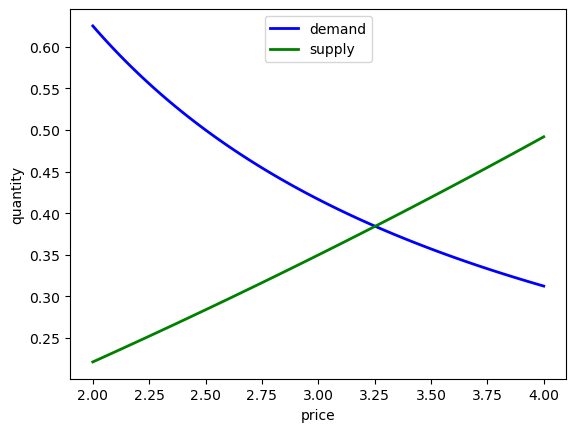

In [6]:
# Now plot
p_grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * p_grid) - 1
qd = 1.25 * p_grid**(-1)


ax.plot(grid, qd, 'b-', lw=2, label='demand')
ax.plot(grid, qs, 'g-', lw=2, label='supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

Now we might consider supply shifts, but you already get the idea that there’s
a lot of repeated code here.

Refactor and improve clarity in the code above using the principles discussed
in this lecture.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def equilibrium(alpha, beta, gamma, delta, p_min=2, p_max=4, plot=True):
    """
    Compute equilibrium price and quantity for:
        q_s(p) = exp(alpha * p) - beta
        q_d(p) = gamma * p^(-delta)

    Parameters
    ----------
    alpha : float
        Supply exponential coefficient.
    beta : float
        Supply shift parameter.
    gamma : float
        Demand scale parameter.
    delta : float
        Demand elasticity parameter.
    p_min, p_max : float, optional
        Bounds for price search interval. Default: (0.1, 10)
    plot : bool, optional
        Whether to plot supply and demand curves. Default: True

    Returns
    -------
    p_star : float
        Equilibrium price.
    q_star : float
        Equilibrium quantity.
    """

    # Define supply and demand functions
    q_s = lambda p: np.exp(alpha * p) - beta
    q_d = lambda p: gamma * p ** (-delta)

    # Define equilibrium condition (q_d = q_s)
    def h(p):
        return q_d(p) - q_s(p)

    # Find equilibrium price using root-finding
    p_star = brentq(h, p_min, p_max)
    q_star = q_d(p_star)

    # Display results
    print(f"Equilibrium price (p*) = {p_star:.4f}")
    print(f"Equilibrium quantity (q*) = {q_star:.4f}")

    # Plot curves
    if plot:
        p_vals = np.linspace(p_min, p_max, 300)
        plt.figure(figsize=(8, 6))
        plt.plot(p_vals, q_d(p_vals), label='Demand $q_d(p)$', lw=2)
        plt.plot(p_vals, q_s(p_vals), label='Supply $q_s(p)$', lw=2)
        plt.scatter(p_star, q_star, color='red', s=60, label='Equilibrium')
        plt.xlabel('Price (p)')
        plt.ylabel('Quantity (q)')
        plt.title('Market Equilibrium')
        plt.legend()
        plt.grid(True)
        plt.show()

    return p_star, q_star

Equilibrium price (p*) = 2.9334
Equilibrium quantity (q*) = 0.3409


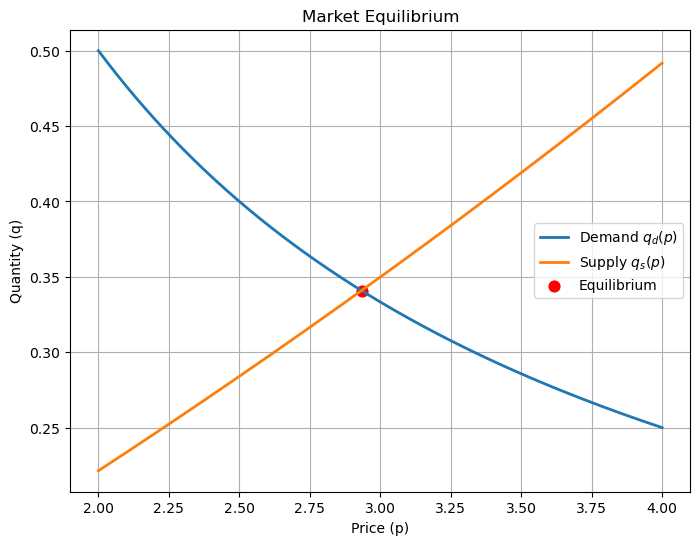

In [7]:
# Example parameters
alpha = 0.1
beta = 1.0
gamma = 1.0
delta = 1.0

p_star, q_star = equilibrium(alpha, beta, gamma, delta, p_min=2, p_max=4)

Here’s one solution.

In [9]:
from typing import NamedTuple

class EquilibriumModel(NamedTuple):
    α: float = 0.1
    β: float = 1.0
    γ: float = 1.0
    δ: float = 1

def qs(model, p):
    return np.exp(model.α * p) - model.β

def qd(model, p):
    return model.γ * p**(-model.δ)

def compute_equilibrium(model):
    def h(p):
        return qd(model, p) - qs(model, p)
    p_star = brentq(h, 2, 4)
    q_star = np.exp(model.α * p_star) - model.β
    return p_star, q_star


def plot_equilibrium(model):
    # Now plot
    grid = np.linspace(2, 4, 100)
    fig, ax = plt.subplots()

    ax.plot(grid, qd(model, grid), 'b-', lw=2, label='demand')
    ax.plot(grid, qs(model, grid), 'g-', lw=2, label='supply')

    ax.set_xlabel('price')
    ax.set_ylabel('quantity')
    ax.legend(loc='upper center')

    plt.show()

Let’s create an instance at the default parameter values.

In [10]:
model = EquilibriumModel()

Now we’ll compute the equilibrium and plot it.

In [11]:
p_star, q_star = compute_equilibrium(model)
print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  2.93
Equilibrium quantity is  0.34


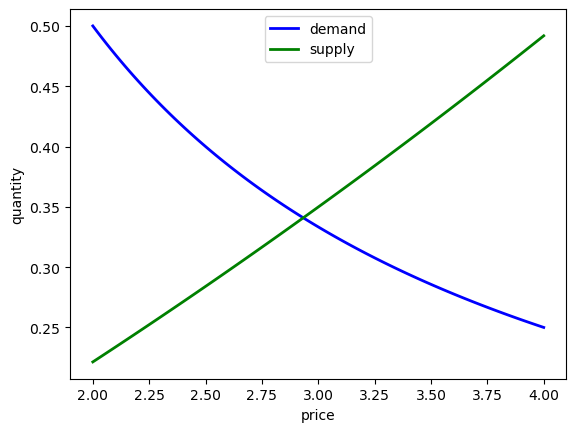

In [12]:
plot_equilibrium(model)

One of the nice things about our refactored code is that, when we change
parameters, we don’t need to repeat ourselves:

In [13]:
model = EquilibriumModel(γ=1.25)

In [14]:
p_star, q_star = compute_equilibrium(model)
print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  3.25
Equilibrium quantity is  0.38


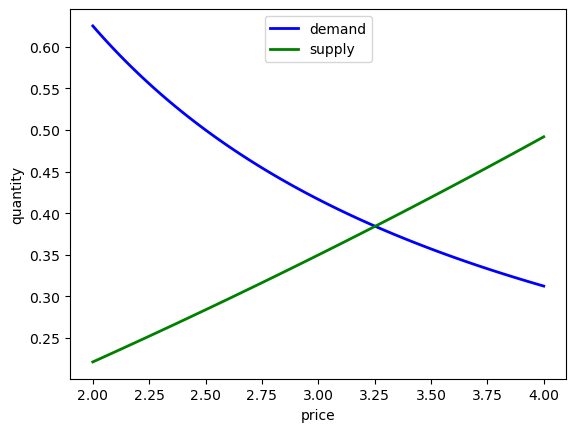

In [15]:
plot_equilibrium(model)